In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from pmf_functions import (
    log_hyper_geometric,
    calculate_posterior,
)

In [2]:
N = 10_000
K = 5000
n = 100

k_values = np.arange(max(0, n + K - N), min(n, K) + 1)

# Hypergeometric

Due to floating point overflow we shall use logs

$$
\log ( \mathbb{P}(k \text{ sample}|K \text{actual}) )
= \log {K \choose k} + \log{{N-K \choose n-k}} - log{N \choose n}
$$

In [3]:
log_hyper_geometric_distribution = [log_hyper_geometric(x=k, n=n, K=K, N=N) for k in tqdm(k_values)]

hyper_geometric_distribution = np.exp(np.array(log_hyper_geometric_distribution))

100%|██████████| 101/101 [00:00<00:00, 235.28it/s]


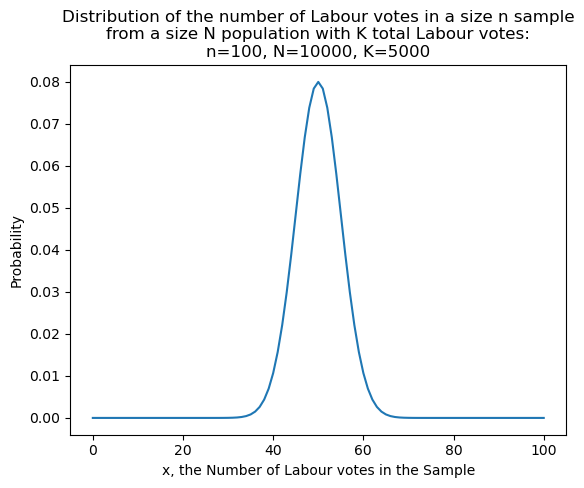

In [4]:
fig, ax = plt.subplots()  # Create a figure containing a single Axes.


ax.plot(k_values, hyper_geometric_distribution)  # Plot some data on the Axes.
ax.set_title(
    "Distribution of the number of Labour votes in a size n sample\n"
    + f"from a size N population with K total Labour votes:\nn={n}, N={N}, K={K}"
)
ax.set_xlabel("x, the Number of Labour votes in the Sample")
ax.set_ylabel("Probability")

plt.show()  # Show the figure.

# Distribution of Actual Ballots!

In [5]:
# Lets of assume of the n votes we see x=60 are Labour
N = 50_000
n = 5_000
x = 2_500
labour_prior = np.array(1 / (N + 1)).repeat(N + 1)
log_labour_prior = np.log(labour_prior)

In [6]:
r_values, posterior = calculate_posterior(x, n, N, log_labour_prior, progress_bar=True)

100%|██████████| 45001/45001 [05:36<00:00, 133.83it/s]


In [7]:
r_values = np.array(r_values)

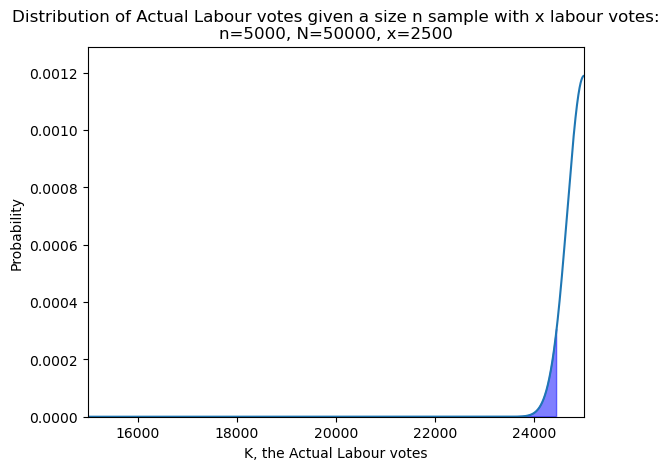

In [8]:
fig, ax = plt.subplots()  # Create a figure containing a single Axes.

ax.plot(r_values, posterior)  # Plot some data on the Axes.

ax.set_title(
    "Distribution of Actual Labour votes given a size n sample with x labour votes"
    + f":\nn={n}, N={N}, x={x}"
)
ax.set_xlabel("K, the Actual Labour votes")
ax.set_ylabel("Probability")
ax.set_xlim([15000, 25000])
ax.set_ylim([0, max(posterior) + 1e-4])

alpha = 0.05
plt.fill_between(
    r_values[np.cumsum(posterior) < alpha],
    posterior[np.cumsum(posterior) < alpha],
    0,
    color="blue",
    alpha=0.5,
)

posterior_cdf = np.cumsum(posterior)

plt.fill_between(
    r_values[posterior_cdf > 1 - alpha],
    posterior[posterior_cdf > 1 - alpha],
    0,
    color="blue",
    alpha=0.5,
)

plt.show()  # Show the figure.

In [9]:
print(len(r_values), len(posterior))

45001 45001


# Compare with Beta Bin Method

Note this only works because in both senarios we have set a uniform prior!

In [13]:
from scipy.stats import betabinom
alpha, beta = 1, 1


#calculate prior 
k_values = np.arange(0, N + 1)
k_prior = betabinom.pmf(k_values, N, alpha, beta)

# calculate posterior
posterior_k_values = np.arange(x, N - n + x + 1)
# or write np.arange(0, N-n+1)
posterior_k_minus_x_values = posterior_k_values - x
k_posterior = betabinom.pmf(posterior_k_minus_x_values, N - n, alpha + x, beta + n - x)

In [17]:
# k value alignment
sum(posterior_k_values - r_values)

0

In [22]:
# MSE between vectors
sum(np.abs(k_posterior - posterior))

6.481319284987983e-11